# Converting Non-stationary Time Series to Stationary

In [1]:
## Importing libraries

import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading dataset

df=pd.read_csv('GlobalLandTemperaturesByState.csv')

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
## Checking data-type

df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [5]:
## Checking dimension of data-set

df.shape

(645675, 5)

In [6]:
## Checking for null values

df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [7]:
## Removing all rows with null values. Since we have large data removing rows would help.

df=df.dropna(how='any',axis=0)
df.shape

(620027, 5)

In [8]:
## Renaming columns

df.columns=['Date','Avg_temp','Conf_int_temp','State','Country']
df.head()

,Date,Avg_temp,Conf_int_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [9]:
## Converting Date to date format

df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [10]:
## Adding Year column to the dataframe

df['Year']=df.index.year
df.head()

,Avg_temp,Conf_int_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [11]:
## Summarising data

df.describe()

,Avg_temp,Conf_int_temp,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [12]:
## Getting data between the years 1980 to 2013

latest_df=df.loc['1980':'2013']
latest_df.head()

,Avg_temp,Conf_int_temp,State,Country,Year
Date,,,,,
1980-01-01,26.652,0.190,Acre,Brazil,1980
1980-02-01,26.495,0.495,Acre,Brazil,1980
1980-03-01,26.270,0.236,Acre,Brazil,1980
1980-04-01,26.430,0.201,Acre,Brazil,1980
1980-05-01,25.802,0.882,Acre,Brazil,1980


In [13]:
## Average temperature Country-wise

latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


<AxesSubplot:xlabel='Year', ylabel='Avg_temp'>

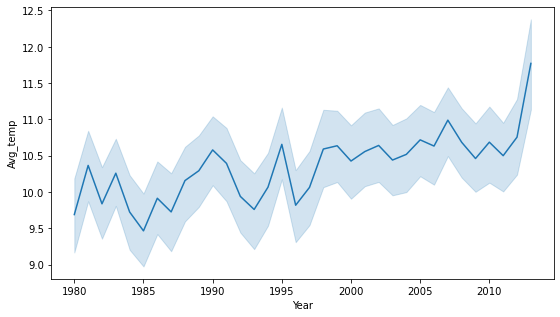

In [14]:
## Plotting the time-series data

plt.figure(figsize=(9,5))
sns.lineplot(x="Year",y="Avg_temp",data=latest_df)

In [15]:
## Finding mean year-wise

resample_df=latest_df[['Avg_temp']].resample('A').mean()
resample_df.head()

,Avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


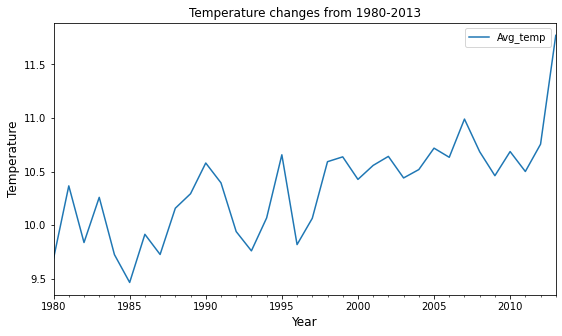

In [16]:
## Plotting for the mean values

resample_df.plot(title='Temperature changes from 1980-2013',figsize=(9,5))
plt.ylabel("Temperature",fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.legend()

In [17]:
## Checking Stationarity of resampled data

from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results:')
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4], index=['Test Statistic','p-value','Lags Used','Number of Obsevation Used'])
for key, value in test_df[4].items():
    df_output['Critical Value (%s)' %key]=value
print(df_output)

Dickey Fuller Test Results:
Test Statistic               -0.728209
p-value                       0.839307
Lags Used                     2.000000
Number of Obsevation Used    31.000000
Critical Value (1%)          -3.661429
Critical Value (5%)          -2.960525
Critical Value (10%)         -2.619319
dtype: float64


In [18]:
# Here Test Statistic is greater than critical value. Therefore we fail to reject our null hypothesis ie, this time series
# is not stationary.

In [19]:
## Decomposing components of timeseries data

decomp=seasonal_decompose(resample_df,freq=3)

Trend=decomp.trend
Seasonal=decomp.seasonal
Residual=decomp.resid

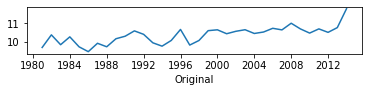

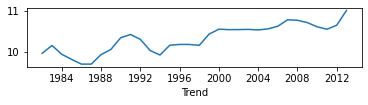

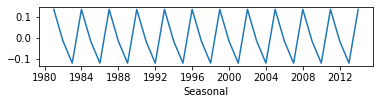

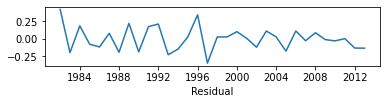

<Figure size 432x360 with 0 Axes>

In [20]:
## Plotting components of time series

plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(Trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(Seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(Residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

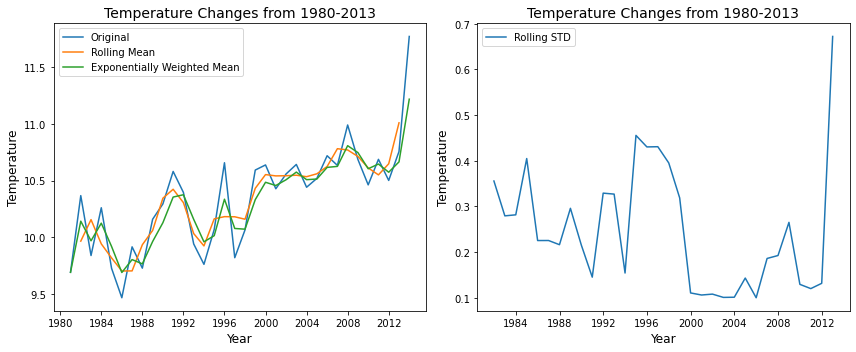

In [21]:
##Transforming data

rol_mean=resample_df.rolling(window=3, center=True).mean()

ewm=resample_df.ewm(span=3).mean()

rol_std=resample_df.rolling(window=3, center=True).std()

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,5))

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Weighted Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std, label='Rolling STD')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [22]:
## Checking ststionarirty of moving-average and exponentially weighted data 

rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print('Dickey-Fuller Test for the Rolling Mean:')
df_test=adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Obsevation Used'])
for key, value in df_test[4].items():
    df_output['Critical Value (%s)' %key]=value
print(df_output)
print('')
print('Dickey-Fuller Test for the Exponential Weighted Mean:')
df_test=adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4], index=['Test Statistic','p-value','Lags Used','Number of Obsevation Used'])
for key, value in df_test[4].items():
    df_output['Critical Value (%s)' %key]=value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                0.275101
p-value                       0.976173
Lags Used                     8.000000
Number of Obsevation Used    23.000000
Critical Value (1%)          -3.752928
Critical Value (5%)          -2.998500
Critical Value (10%)         -2.638967
dtype: float64

Dickey-Fuller Test for the Exponential Weighted Mean:
Test Statistic               -0.338693
p-value                       0.919843
Lags Used                     2.000000
Number of Obsevation Used    31.000000
Critical Value (1%)          -3.661429
Critical Value (5%)          -2.960525
Critical Value (10%)         -2.619319
dtype: float64


In [23]:
## We fail to reject null hypothesis. The ts is not stationary time series.

In [24]:
diff_rol_mean=resample_df-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [25]:
diff_ewm_mean=resample_df-ewm
diff_ewm_mean.dropna(inplace=True)
diff_ewm_mean.head()

,Avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


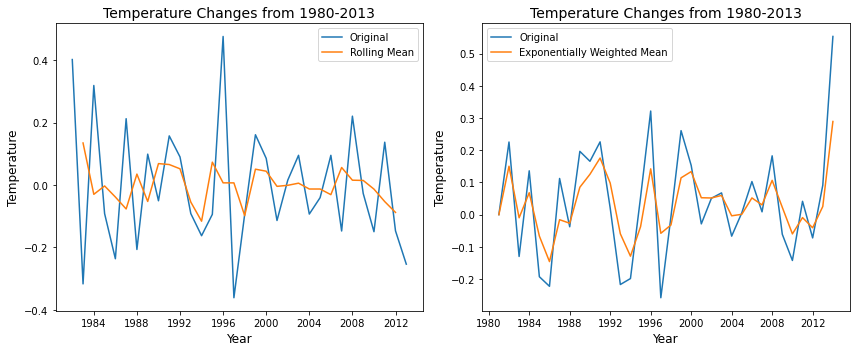

In [26]:
## Plotting differenced mean of Moving-Average and Exponential weighted mean

df_rol_mean_diff = diff_rol_mean.rolling(window=3,center=True).mean()

df_ewm_diff=diff_ewm_mean.ewm(span=3).mean()

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,5))

ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm_mean, label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [27]:
##Checking Sationarity

print('Dickey-Fuller Test for the differencing between the Original and Rolling Mean:')
dftest=adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Obsevation Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
print(dfoutput)
print('')
print('Dickey-Fuller Test for the Exponential Weighted Mean:')
dftest=adfuller(diff_ewm_mean.iloc[:,0].values,autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Obsevation Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
print(dfoutput)

Dickey-Fuller Test for the differencing between the Original and Rolling Mean:
Test Statistic              -7.007710e+00
p-value                      7.051586e-10
Lags Used                    1.000000e+00
Number of Obsevation Used    3.000000e+01
Critical Value (1%)         -3.669920e+00
Critical Value (5%)         -2.964071e+00
Critical Value (10%)        -2.621171e+00
dtype: float64

Dickey-Fuller Test for the Exponential Weighted Mean:
Test Statistic               -4.297446
p-value                       0.000449
Lags Used                     1.000000
Number of Obsevation Used    32.000000
Critical Value (1%)          -3.653520
Critical Value (5%)          -2.957219
Critical Value (10%)         -2.617588
dtype: float64


In [28]:
## We reject H0. Therefore, the time series is stationary series.

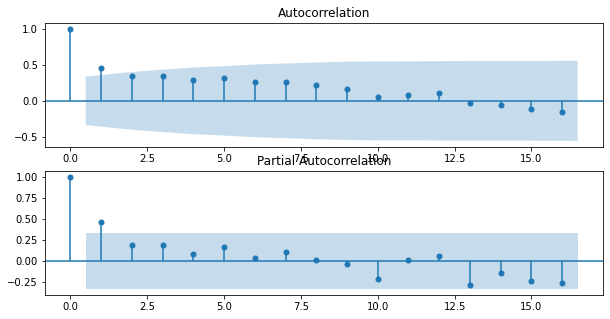

In [29]:
## Plotting Acf and pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df,ax=pyplot.gca())
pyplot.show()